<a href="https://colab.research.google.com/github/lexaizm/ml_service_design_202306/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22EDA_credit_scoring_template_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Банковская просрочка по кредиту

Датасет содержит информацию о клиентах некоторого банка.  
Ваша задача состоит в том, чтобы по различным характеристикам клиентов спрогнозировать целевую переменную - имел клиент просрочку 90 и более дней или нет (и если имел, то банк не будет выдавать кредит этому клиенту, а иначе будет)

## Импорт библиотек, константы

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
RANDOM_STATE = 42

In [ ]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/credit_scoring.csv"

## Загрузка и обзор данных

### Загрузка

In [ ]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `SeriousDlqin2yrs`: клиент имел просрочку 90 и более дней

**Признаки**
- `RevolvingUtilizationOfUnsecuredLines`: общий баланс средств (total balance on credit cards and personal lines of credit except real estate and no installment debt
like car loans divided by the sum of credit limits)
- `age`: возраст заемщика
- `NumberOfTime30-59DaysPastDueNotWorse`: сколько раз за последние 2 года наблюдалась просрочка 30-59 дней
- `DebtRatio`: ежемесячные расходы (платеж по долгам, алиментам, расходы на проживания) деленные на месячный доход
- `MonthlyIncome`: ежемесячный доход
- `NumberOfOpenCreditLinesAndLoans`: количество открытых кредитов (напрмер, автокредит или ипотека) и кредитных карт
- `NumberOfTimes90DaysLate`: сколько раз наблюдалась просрочка (90 и более дней)
- `RealEstateLoansOrLines`: закодированное количество кредиов (в том числе под залог жилья) - чем больше код буквы, тем больше кредитов
- `NumberOfTime60-89DaysPastDueNotWorse`: сколько раз за последние 2 года заемщик задержал платеж на 60-89 дней
- `NumberOfDependents`: количество иждивенцев на попечении (супруги, дети и др)
- `GroupAge`: закодированная возрастная группа - чем больше код, тем больше возраст

In [ ]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   135155 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

In [ ]:
df['RealEstateLoansOrLines'] = df['RealEstateLoansOrLines'].apply(lambda x: ord(x) - ord('A'))
df['age'] = df['age'].fillna(df.groupby('GroupAge')['age'].transform('mean'))
df['MonthlyIncome'].fillna(0, inplace=True)
df['NumberOfDependents'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    150000 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  int64  
 11  

<Axes: >

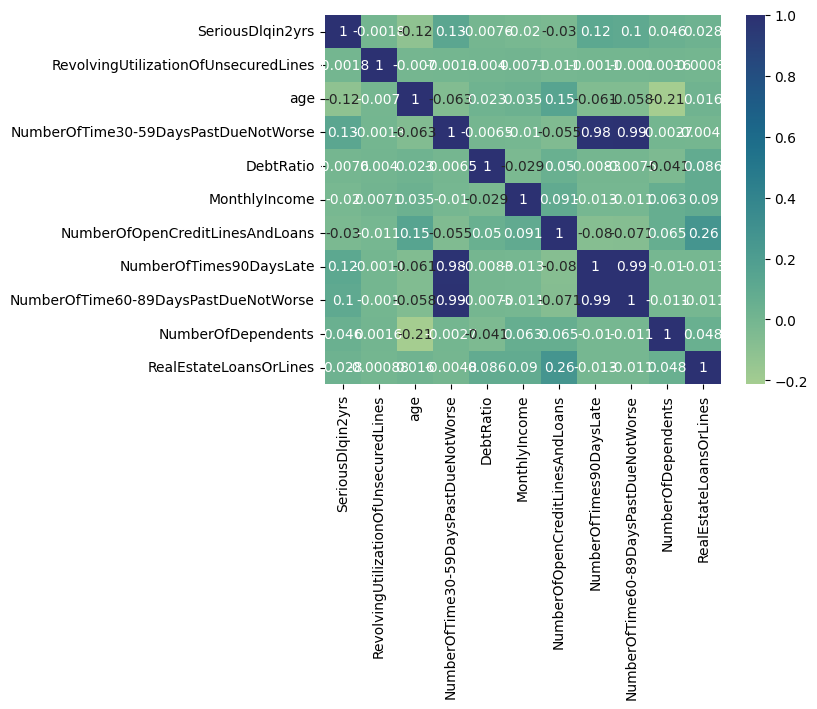

In [ ]:
corr = df.drop(['GroupAge'], axis=1).corr()

sns.heatmap(corr, cmap="crest", annot=True)

NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse коррелируют под 100% - убрать последние две

In [ ]:
sns.histplot(df['age'], kde=True)
plt.show()

In [ ]:
df.groupby('GroupAge').mean()['age']

GroupAge
a     0.000000
b    29.388514
c    42.687315
d    56.882204
e    73.239558
Name: age, dtype: float64

In [ ]:
df[df['GroupAge'] == 'a']

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
41655,0,1.0,0.0,1,0.436927,6000.0,6,0,0,2.0,A,a


In [ ]:
df['RealEstateLoansOrLines'].value_counts(dropna=False)

A    140048
B      8470
C      1388
D        84
E        10
Name: RealEstateLoansOrLines, dtype: int64

In [ ]:
X = df.drop(['SeriousDlqin2yrs','GroupAge', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'], axis=1)

y = df['SeriousDlqin2yrs'] # целевая переменная (target)

In [ ]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfDependents,RealEstateLoansOrLines
0,0.221813,43.0,0,0.527888,3280.0,7,2.0,0
1,0.602794,25.0,0,0.065868,333.0,2,0.0,0
2,0.025656,38.0,0,0.475841,3000.0,7,2.0,0
3,0.075427,32.0,0,0.085512,7916.0,6,0.0,0
4,0.046560,58.0,0,0.241622,2416.0,9,0.0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((112500, 8), (37500, 8))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfDependents,RealEstateLoansOrLines
0,1.132657e-06,0.568807,0.000000,1.005208e-02,0.000000,0.241379,0.0,0.0
1,1.207016e-05,0.458716,0.000000,1.123213e-06,0.000665,0.086207,0.0,0.0
2,4.881754e-06,0.605505,0.000000,5.318356e-07,0.004653,0.120690,0.0,0.0
3,1.360017e-05,0.431193,0.010204,2.490151e-06,0.000774,0.172414,0.0,0.0
4,5.152353e-07,0.266055,0.000000,2.772220e-06,0.000665,0.068966,0.0,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
# from sklearn import preprocessing

model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[34905,    28],
       [ 2527,    40]])

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy_score(y_test, pred), recall_score(y_test, pred), precision_score(y_test, pred)

(0.9318666666666666, 0.015582391897156213, 0.5882352941176471)

In [ ]:
probs = model.predict_proba(X_test)

In [ ]:
classes = probs[:,1] > 0.07
confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[21658, 13275],
        [ 1076,  1491]]),
 0.5808336579664979)

In [ ]:
model.coef_

array([[-0.65685834, -2.58342494,  3.53903036, -0.83239346, -1.72262746,
        -1.02334722,  2.21337465,  1.62724921]])

In [ ]:
importances = pd.DataFrame({'weights': model.coef_[0], 'features': X_train.columns}).sort_values(by='weights')
importances

,weights,features
1,-2.583425,age
4,-1.722627,MonthlyIncome
5,-1.023347,NumberOfOpenCreditLinesAndLoans
3,-0.832393,DebtRatio
0,-0.656858,RevolvingUtilizationOfUnsecuredLines
7,1.627249,RealEstateLoansOrLines
6,2.213375,NumberOfDependents
2,3.539030,NumberOfTime30-59DaysPastDueNotWorse


In [ ]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

#а так модель можно загрузить из файла:
# with open('model.pickle', 'rb') as f:
#     model = pickle.load(f)

In [ ]:
df['age'] = df['age'].fillna(df.groupby('GroupAge')['age'].transform('mean'))
df['MonthlyIncome'].fillna(0, inplace=True)
df['NumberOfDependents'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    150000 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

In [ ]:
X = df.drop(['SeriousDlqin2yrs','GroupAge', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'], axis=1)

y = df['SeriousDlqin2yrs'] # целевая переменная (target)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((112500, 8), (37500, 8))

In [ ]:
y_train.value_counts(), y_test.value_counts()

(0    105041
 1      7459
 Name: SeriousDlqin2yrs, dtype: int64,
 0    34933
 1     2567
 Name: SeriousDlqin2yrs, dtype: int64)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

categorical = ['RealEstateLoansOrLines']
numeric_features = [col for col in X_train.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)
X_train_transformed.shape, X_test_transformed.shape

((112500, 11), (37500, 11))

In [ ]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=lst)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=lst)

X_train_transformed.head()


,RealEstateLoansOrLines_B,RealEstateLoansOrLines_C,RealEstateLoansOrLines_D,RealEstateLoansOrLines_E,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfDependents
0,0.0,0.0,0.0,0.0,1.132657e-06,0.568807,0.000000,1.005208e-02,0.000000,0.241379,0.0
1,0.0,0.0,0.0,0.0,1.207016e-05,0.458716,0.000000,1.123213e-06,0.000665,0.086207,0.0
2,0.0,0.0,0.0,0.0,4.881754e-06,0.605505,0.000000,5.318356e-07,0.004653,0.120690,0.0
3,0.0,0.0,0.0,0.0,1.360017e-05,0.431193,0.010204,2.490151e-06,0.000774,0.172414,0.0
4,0.0,0.0,0.0,0.0,5.152353e-07,0.266055,0.000000,2.772220e-06,0.000665,0.068966,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_transformed, y_train)
pred = model.predict_proba(X_test_transformed)[:,1]

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score
classes = pred > 0.05
confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[13173, 21760],
        [  467,  2100]]),
 0.8180755746007012)